## Import Libraries and Dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.naive_bayes import GaussianNB

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [2]:
data = pd.read_csv('../Logistic Regression/Mark.txt', sep=',', header=None, names=['Mark_1', 'Mark-2', 'Admitted'])
data

,Mark_1,Mark-2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


## Splitting Dataset

In [3]:
features = ['Mark_1', 'Mark-2']
target = 'Admitted'
X = data[features]
y = data[target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)

In [4]:
print(f'Train Data: {X_train.shape}')
print(f'Validation Data: {X_valid.shape}')

Train Data: (75, 2)
Validation Data: (25, 2)


## Standardization

In [6]:
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_valid_scaled = pd.DataFrame(sc.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

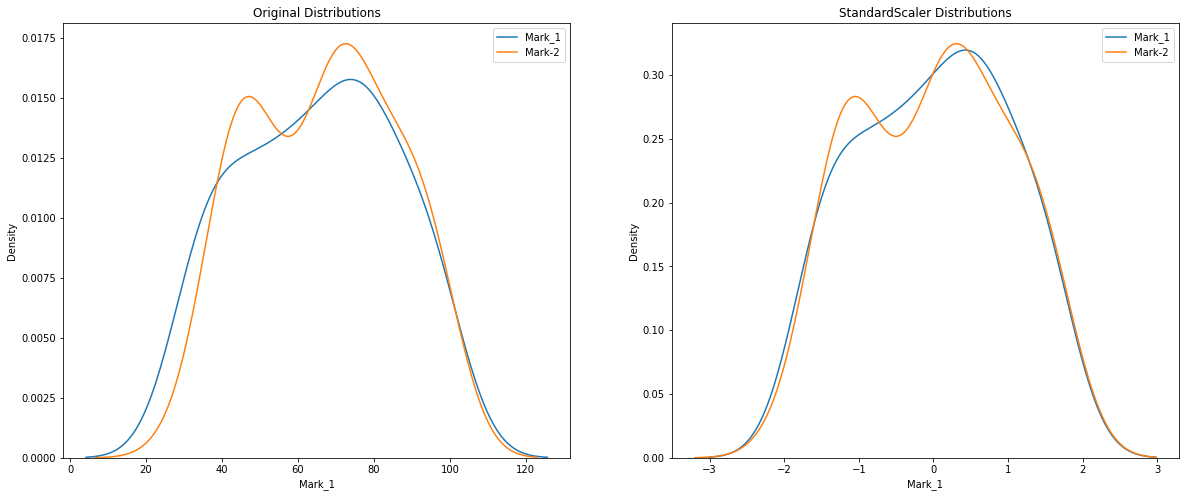

In [7]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,8))
ax1.set_title('Original Distributions')

for f in features:
    sns.kdeplot(X_train[f], ax=ax1, label=f)
ax1.legend()

ax2.set_title('StandardScaler Distributions')

for f in features:
    sns.kdeplot(X_train_scaled[f], ax=ax2, label=f)
ax2.legend()

plt.show()

## Modelling

In [9]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [10]:
pred = model.predict(X_valid_scaled)

## Model Evaluation

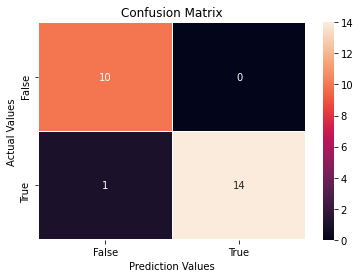

In [12]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_valid, pred)
ax = sns.heatmap(cf, annot=True, linewidth=0.1)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Prediction Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [14]:
TRUTH_VALUE = y_valid
print(f'Accuracy Score: {accuracy_score(TRUTH_VALUE, pred)}')
print(f'Precision Score: {precision_score(TRUTH_VALUE, pred)}')
print(f'Recall Score: {recall_score(TRUTH_VALUE, pred)}')
print(f'F1 Score: {f1_score(TRUTH_VALUE, pred)}')
print(f'\nClassification Score:\n {classification_report(TRUTH_VALUE, pred)}')

Accuracy Score: 0.96
Precision Score: 1.0
Recall Score: 0.9333333333333333
F1 Score: 0.9655172413793104

Classification Score:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

